In [1]:
import numpy as np
import matplotlib.pyplot as plt

from modules import node, system, sensing
from modules import optimization as opt
from configs import config

noise_power = config.NOISE_POWER

In [2]:
tx = node.TX(x=0, y=0, z=10)
rx = node.RX(x=50, y=50, z=1.5)
ris = node.RIS(x=10, y=50, z=2, N=40)
sys = system.System(tx, ris, rx)

is_los = True
N_samples = 3000
n_loop = 1000

figure_name = 'fig_decay_h0.pdf'

In [3]:
def cal_born(alpha: float) -> float:
    all_born = []

    for i in range(n_loop):
        print("---------------------------")
        print(f"Computing LOOP {i}")
        sys.gen_channels(is_los=is_los)
        sys.w_true = np.sqrt(alpha) * sys.w_true
        sys.c_true = alpha * sys.c_true

        # Stage 0: sending samples and collect observation:
        X = np.zeros(shape=(sys.ris.N, N_samples))
        y = np.zeros(shape=(N_samples, 1))
        for j in range(N_samples):
            # generate a random ris setting
            sys.ris.set_random_binary_phase_shifts()
            x = sys.ris.vector_x
            X[:, j] = x.flatten()
            y[j] = sys.cal_snr() - sys.c_true

        sens = sensing.Sensing(B=400, N=sys.ris.N)
        M_est, w_est, _ = sens.solve(X=X, y=y, convergence_plot=False) # Stage 1: sensing
        M_est_proj = sens.project_to_psd_lowrank(M_est, r=2) # projection to low rank
        sys.ris.vector_x = opt.solve_our_optimization(M_est_proj, w_est) # Stage 2: optimization
        sys.ris.theta = np.arccos(sys.ris.vector_x)
        born = 10 * np.log10(sys.cal_snr())
        
        all_born.append(born)
    return np.mean(all_born)

born = []
for i in range(10):
    born.append(cal_born(10**-i))

---------------------------
Computing LOOP 0
---------------------------
Computing LOOP 1
---------------------------
Computing LOOP 2
---------------------------
Computing LOOP 3
---------------------------
Computing LOOP 4
---------------------------
Computing LOOP 5
---------------------------
Computing LOOP 6
---------------------------
Computing LOOP 7
---------------------------
Computing LOOP 8
---------------------------
Computing LOOP 9
---------------------------
Computing LOOP 10
---------------------------
Computing LOOP 11
---------------------------
Computing LOOP 12
---------------------------
Computing LOOP 13
---------------------------
Computing LOOP 14
---------------------------
Computing LOOP 15
---------------------------
Computing LOOP 16
---------------------------
Computing LOOP 17
---------------------------
Computing LOOP 18
---------------------------
Computing LOOP 19
---------------------------
Computing LOOP 20
---------------------------
Computing LOOP 2

In [4]:
def cal_others(alpha: float) -> float:
    all_rms = []
    all_rfocus = []
    all_csm = []
    all_perfect = []

    for i in range(n_loop):
        print("---------------------------")
        print(f"Computing LOOP {i}")
        sys.gen_channels(is_los=is_los)
        sys.w_true = np.sqrt(alpha) * sys.w_true
        sys.c_true = alpha * sys.c_true

        # Stage 0: sending samples and collect observation:
        X = np.zeros(shape=(sys.ris.N, N_samples))
        y = np.zeros(shape=(N_samples, 1))
        for j in range(N_samples):
            # generate a random ris setting
            sys.ris.set_random_binary_phase_shifts()
            x = sys.ris.vector_x
            X[:, j] = x.flatten()
            y[j] = sys.cal_snr() - sys.c_true

        # RMS
        sys.ris.vector_x = opt.RMS(X, y)
        rms = 10 * np.log10(sys.cal_snr())
        # RFocus
        sys.ris.vector_x = opt.RFocus(X, y)
        rfocus = 10 * np.log10(sys.cal_snr())
        # Conditional Sample Mean
        sys.ris.vector_x = opt.CSM(X, y)
        csm = 10 * np.log10(sys.cal_snr())
        # Perfect_csi
        sys.ris.theta, sys.ris.vector_x = opt.perfect_csi(h_0=np.sqrt(alpha) * sys.h_0, h_=sys.h)
        perfect_csi = 10 * np.log10(sys.cal_snr())
        
        all_rms.append(rms)
        all_rfocus.append(rfocus)
        all_csm.append(csm)
        all_perfect.append(perfect_csi)

    return np.mean(all_rms), np.mean(all_rfocus), np.mean(all_csm), np.mean(all_perfect)

rms, rfocus, csm, perfect = [], [], [], []
for i in range(10):
    a, b, c, d = cal_others((10**-i))
    rms.append(a)
    rfocus.append(b)
    csm.append(c)
    perfect.append(d)

---------------------------
Computing LOOP 0
---------------------------
Computing LOOP 1
---------------------------
Computing LOOP 2
---------------------------
Computing LOOP 3
---------------------------
Computing LOOP 4
---------------------------
Computing LOOP 5
---------------------------
Computing LOOP 6
---------------------------
Computing LOOP 7
---------------------------
Computing LOOP 8
---------------------------
Computing LOOP 9
---------------------------
Computing LOOP 10
---------------------------
Computing LOOP 11
---------------------------
Computing LOOP 12
---------------------------
Computing LOOP 13
---------------------------
Computing LOOP 14
---------------------------
Computing LOOP 15
---------------------------
Computing LOOP 16
---------------------------
Computing LOOP 17
---------------------------
Computing LOOP 18
---------------------------
Computing LOOP 19
---------------------------
Computing LOOP 20
---------------------------
Computing LOOP 2

In [5]:
def cal_gcsm(alpha: float) -> float:
    all_gcsm = []

    for i in range(n_loop):
        print("---------------------------")
        print(f"Computing LOOP {i}")
        sys.gen_channels(is_los=is_los)
        sys.w_true = np.sqrt(alpha) * sys.w_true
        sys.c_true = alpha * sys.c_true

        sys.run_GCSM(N_samples=N_samples)
        gcsm = 10 * np.log10(sys.cal_snr())
        all_gcsm.append(gcsm)

    return np.mean(all_gcsm)

gcsm = []
for i in range(10):
    gcsm.append(cal_gcsm(10**-i))

---------------------------
Computing LOOP 0
---------------------------
Computing LOOP 1
---------------------------
Computing LOOP 2
---------------------------
Computing LOOP 3
---------------------------
Computing LOOP 4
---------------------------
Computing LOOP 5
---------------------------
Computing LOOP 6
---------------------------
Computing LOOP 7
---------------------------
Computing LOOP 8
---------------------------
Computing LOOP 9
---------------------------
Computing LOOP 10
---------------------------
Computing LOOP 11
---------------------------
Computing LOOP 12
---------------------------
Computing LOOP 13
---------------------------
Computing LOOP 14
---------------------------
Computing LOOP 15
---------------------------
Computing LOOP 16
---------------------------
Computing LOOP 17
---------------------------
Computing LOOP 18
---------------------------
Computing LOOP 19
---------------------------
Computing LOOP 20
---------------------------
Computing LOOP 2

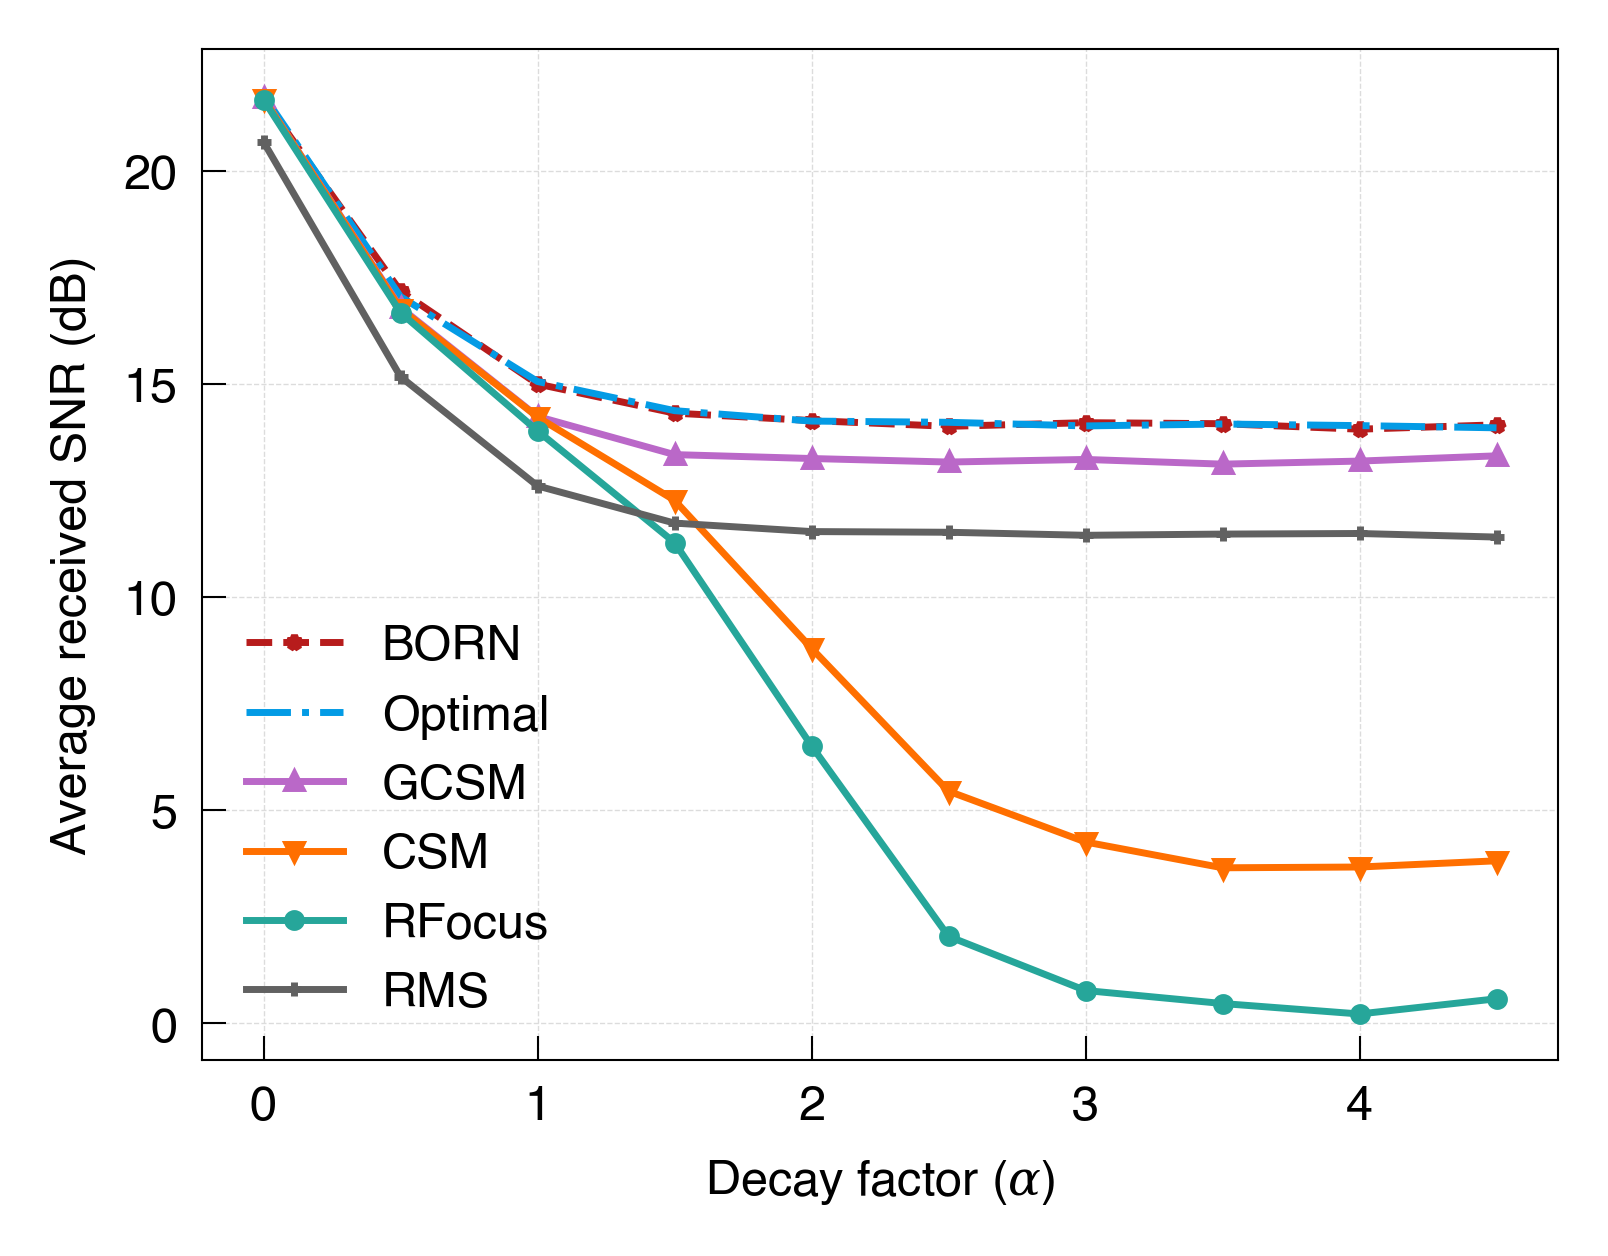

In [6]:
colors = ['#B71C1C', '#039BE5', '#26A69A', '#FF6F00', '#616161', '#BA68C8', '#EC407A']
plt.figure(figsize=(3.5, 2.625), dpi=500)
#Font setup
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 7
plt.rcParams['legend.fontsize'] = 7

plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 0.3
plt.rcParams['ytick.major.width'] = 0.3
plt.rcParams['axes.linewidth'] = 0.3

alpha = np.arange(10)/2
plt.plot(alpha, born, marker='*', markersize='2.0', label='BORN', color=colors[0], linewidth=1.0, ls='--')
plt.plot(alpha, perfect, marker=None, markersize='2.0', label='Optimal', color=colors[1], linewidth=1.0, ls='-.')
plt.plot(alpha, gcsm, marker='^', markersize='2.0', label='GCSM', color=colors[5], linewidth=1.0, ls='-')
plt.plot(alpha, csm, marker='v', markersize='2.0', label='CSM', color=colors[3], linewidth=1.0, ls='-')
plt.plot(alpha, rfocus, marker='o', markersize='2.0', label='RFocus', color=colors[2], linewidth=1.0, ls='-')
plt.plot(alpha, rms, marker='+', markersize='2.0', label='RMS', color=colors[4], linewidth=1.0, ls='-')

plt.xlabel(r'Decay factor ($\alpha$)')
plt.ylabel('Average received SNR (dB)')
# plt.xlim([-9, 12])
# plt.xlim([-0.5, 5])
leg = plt.legend(frameon=False, edgecolor='black', framealpha=0.8)
leg.get_frame().set_linewidth(0.3)
plt.grid(color='gainsboro', linestyle='--', linewidth=0.2)
plt.savefig('fig_decay_h0.pdf', dpi=500, bbox_inches='tight', pad_inches=0.05)